In [3]:
import pandas as pd
samples = [
    'Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert'
]

in_dir = '/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq'
out_dir = '/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq'
for sample in samples:
    df = pd.read_csv("%s/%s.txt" % (in_dir, sample), sep='\t')
    df_closest= pd.read_csv("%s/%s.rlog.closest_gene.txt" % (in_dir, sample), index_col=0, sep='\t',
                            names=['peak', 'genes', 'distance'])
    df.join(df_closest, how='outer')\
        .to_csv("%s/%s.with_closest_gene.txt" % (out_dir, sample), sep='\t')


### filter the Th1 72hr genes based on clustering

In [32]:
import pandas as pd

Th1_72hr = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/Th1.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt', sep='\t')
Th1_72hr_filtered = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered.txt', sep='\t')

Th1_72hr_filtered_genes = Th1_72hr_filtered.GeneName.unique().tolist()
Th1_72hr_genes_filtered = Th1_72hr[Th1_72hr['GeneName'].isin(Th1_72hr_filtered_genes)]
Th1_72hr_genes_filtered.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered_with_padj.txt', sep='\t', index=False)
Th1_72hr_genes_filtered.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered_with_padj.bed', sep='\t', index=False, header=None)


In [22]:
!head /data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.with_closest_gene.txt

	baseMean	log2FoldChange	lfcSE	pvalue	padj	genes	distance
GL456216.1_15713_17710	2311.56336130327	0.20889764090613297	0.0571224815548744	7.545193953669499e-05	0.00022017503137092403	.	-1
GL456216.1_30989_33679	186.931416391265	1.3356507574959	0.189790786830929	9.95365616068528e-13	8.101553541063482e-12	.	-1
GL456216.1_38195_39383	123.88002774333	0.59041466662461	0.252621205818136	0.0034628514937504397	0.007595324616608909	.	-1
GL456216.1_40443_42115	108.61452327927499	0.262700032364464	0.23604896603786105	0.104739553483017	0.162994923492066	.	-1
GL456233.1_159366_160134	157.589478409328	-0.0434492715606752	0.150761649882081	0.698951625374047	0.77294941812622	.	-1
GL456233.1_163840_164893	57.234241602107296	2.36316800281018	0.368135848081556	2.9744155634115e-11	2.0515603458367e-10	.	-1
GL456233.1_38659_39639	261.280880605414	0.13056832959982098	0.144149730200535	0.22850034404494501	0.31658433798758	.	-1
GL456239.1_34641_39720	92.3157555683782	-0.0637145907112842	0.18994659274641604	0.63

In [23]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/integration/plots
source /data/reddylab/software/miniconda2/bin/activate alex_dev
module load gcc
for fdr in $(echo 0.05);
do 
python /data/reddylab/Revathy/scripts/combined_scatter_plot_of_deseq2_results_v1.py \
    -1 /data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.with_closest_gene.txt  \
    -2 /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered_with_padj.txt \
    --suffixes "_atacseq" "_rnaseq" \
    --padj-cols "padj_atacseq" "padj_rnaseq" \
    --log2fc-cols "log2FoldChange_atacseq" "log2FoldChange_rnaseq" \
    --legend-group-labels "DA" "DEG" \
    --axes-labels "ATAC-seq log2fc" "RNA-seq log2fc" \
    --how "inner" \
    --genes-to-highlight "Foxp3" "Tbx21" "Il21r"\
    --gene-name-col "GeneName" \
    --output-format png pdf \
    --fdr-thres ${fdr} \
    --input-file1-join-col "genes" \
    --input-file2-join-col "GeneName" \
    --colors 'grey' '#008695' '#E68310' '#E73F74'  \
    --remove-pseudogenes \
    --fig_size_x 8 \
    --fig_size_y 6 \
    -o /data/reddylab/Revathy/collabs/Keith/Th1/data/integration/plots/Th1_Th0.72hr.rna_atac.new.combined_scatter_plot.fdr${fdr}  
    
done

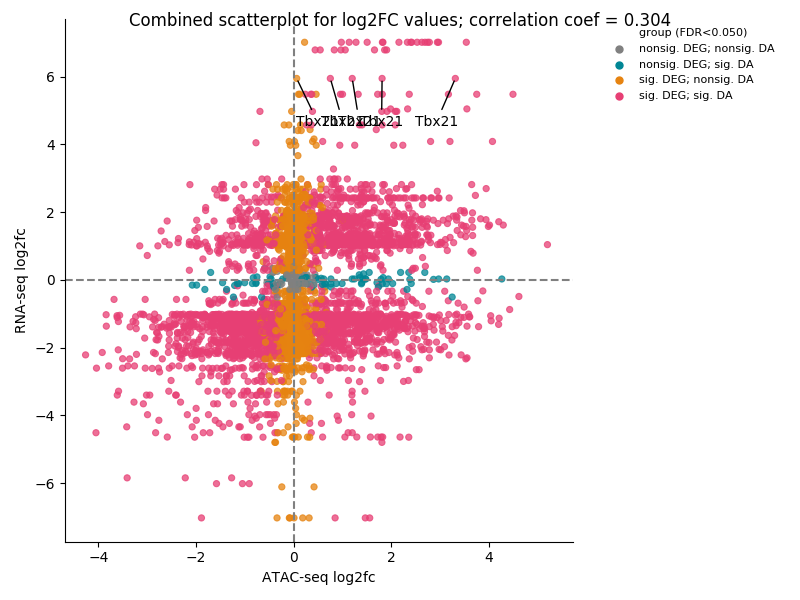

In [24]:
from IPython.display import display,Image
display(Image('/data/reddylab/Revathy/collabs/Keith/Th1/data/integration/plots/Th1_Th0.72hr.rna_atac.new.combined_scatter_plot.fdr0.05.png'))
    

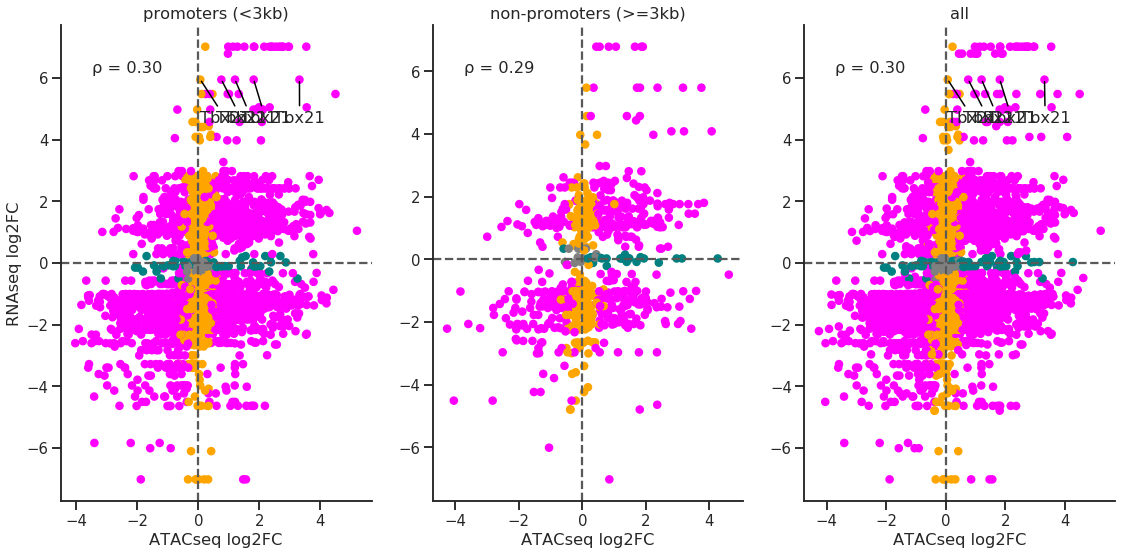

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 
%matplotlib inline


def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.1, .9), xycoords=ax.transAxes)


merged = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/integration/plots/Th1_Th0.72hr.rna_atac.new.combined_scatter_plot.fdr0.05.txt', sep='\t')
merged['Annotation'] = ['Promoter' if (x < 3000) else 'Non-promoter' for x in merged['distance']] 
# merged_promoter = merged[merged['Annotation'] == 'Promoter']
# merged_nonpromoter = merged[merged['Annotation'] == 'Non-promoter']
colors = {'sig. DEG; sig. DA': 'magenta', 'sig. DEG; nonsig. DA': 'orange', 'nonsig. DEG; sig. DA': 'teal', 'nonsig. DEG; nonsig. DA': 'grey'}


sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
fig, ax = plt.subplots(1, 3, figsize=(16,8))

ax1 = ax.flatten()[0]
points = ax1.scatter(
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_rnaseq'],
    c=merged.loc[np.abs(merged.distance)<3000, 'group (FDR<0.050)'].apply(lambda x: colors[x]),
    vmax=1e4, s=50)
corrfunc(
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_rnaseq'],
    ax=ax1, method='spearman'
)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_rnaseq'],
    c=merged.loc[np.abs(merged.distance)>=3000, 'group (FDR<0.050)'].apply(lambda x: colors[x]),
    vmax=1e4, s=50)
corrfunc(
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_rnaseq'],
    ax=ax2, method='spearman'
)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    merged.loc[:, 'log2FoldChange_atacseq'],
    merged.loc[:, 'log2FoldChange_rnaseq'],
    c=merged.loc[:, 'group (FDR<0.050)'].apply(lambda x: colors[x]),
    vmax=1e4, s=50)
corrfunc(
    merged.loc[:, 'log2FoldChange_atacseq'],
    merged.loc[:, 'log2FoldChange_rnaseq'],
    ax=ax3, method='spearman'
)

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATACseq log2FC')
ax1.set_ylabel('RNAseq log2FC')
ax1.set_title('promoters (<3kb)')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATACseq log2FC')
ax2.set_title('non-promoters (>=3kb)')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.set_xlabel('ATACseq log2FC')
ax3.set_title('all')
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')

sig_genes = ['Tbx21', 'Il21r']

### can take unique of the genes with the highest values of log2FC for annotating
for x, y, t in zip(
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_atacseq'], 
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_rnaseq'], 
    merged.loc[np.abs(merged.distance)<3000, 'genes']):
    if t not in sig_genes: continue
    ax1.annotate('{}'.format(t), xy=(x, y), 
                    xytext=(.75*x, .75*y), #xytext=(5, 0), 
                    ha='left', va='bottom', #ha='left',
                    arrowprops=dict(arrowstyle='-', color='black'))
    
for x, y, t in zip(
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_atacseq'], 
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_rnaseq'], 
    merged.loc[np.abs(merged.distance)>=3000, 'genes']):
    if t not in sig_genes: continue
    ax2.annotate('{}'.format(t), xy=(x, y), 
                    xytext=(.75*x, .75*y), #xytext=(5, 0), 
                    ha='left', va='bottom', #ha='left',
                    arrowprops=dict(arrowstyle='-', color='black'))

for x, y, t in zip(
    merged.loc[:, 'log2FoldChange_atacseq'], 
    merged.loc[:, 'log2FoldChange_rnaseq'], 
    merged.loc[:, 'genes']):
    if t not in sig_genes: continue
    ax3.annotate('{}'.format(t), xy=(x, y), 
                    xytext=(.75*x, .75*y), #xytext=(5, 0), 
                    ha='left', va='bottom', #ha='left',
                    arrowprops=dict(arrowstyle='-', color='black'))

# plt.legend(bbox_to_anchor=(1,1), frameon=False, fontsize=10, labels=labels)
# plt.ylabel('RNAseq logFC')
# plt.xlabel('ATACseq logFC')

sns.despine()
plt.tight_layout()
#plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/coordinate_plot_ATAC_RNA_Pdpn.pdf')

plt.show()


In [6]:
merged[(merged['log2FoldChange_atacseq']>0)&(merged['log2FoldChange_rnaseq']>6)]

,Unnamed: 0_atacseq,baseMean_atacseq,log2FoldChange_atacseq,lfcSE_atacseq,pvalue_atacseq,padj_atacseq,genes,distance,Unnamed: 0_rnaseq,baseMean_rnaseq,log2FoldChange_rnaseq,lfcSE_rnaseq,pvalue_rnaseq,padj_rnaseq,GeneName,GeneType,group (FDR<0.050),Annotation
836,chr13_51833737_51834423,53.520262,1.059201,0.372209,9.462810e-04,2.299802e-03,Gadd45g,12255,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Non-promoter
837,chr13_51839458_51840135,95.291531,0.442702,0.278432,2.591150e-02,4.742016e-02,Gadd45g,6543,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Non-promoter
838,chr13_51845279_51849760,1882.940976,0.970241,0.062807,3.091015e-54,4.147154e-52,Gadd45g,0,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Promoter
839,chr13_51859312_51860347,120.566764,1.866647,0.239610,2.722643e-15,2.868909e-14,Gadd45g,-10845,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Promoter
840,chr13_51885704_51886697,429.258854,0.546623,0.126776,3.904854e-06,1.384458e-05,Gadd45g,-37237,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Promoter
841,chr13_51892006_51892761,88.067085,1.658621,0.278242,1.129531e-09,6.486451e-09,Gadd45g,-43539,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Promoter
842,chr13_51906186_51906565,42.183111,1.907680,0.408165,9.732662e-07,3.774208e-06,Gadd45g,-57719,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Promoter
843,chr13_51908090_51909300,164.645088,0.835108,0.202972,1.080259e-05,3.589623e-05,Gadd45g,-59623,ENSMUSG00000021453.2,714.377634,6.788005,0.189716,6.834102e-282,1.446643e-278,Gadd45g,protein_coding,sig. DEG; sig. DA,Promoter
4188,chr6_67301723_67302950,242.184640,1.140119,0.167115,3.993162e-12,3.036523e-11,Il12rb2,0,ENSMUSG00000018341.12,1831.124013,7.014277,0.218945,8.014199e-227,5.654819e-224,Il12rb2,protein_coding,sig. DEG; sig. DA,Promoter
4189,chr6_67308644_67309307,29.965696,1.508030,0.476935,3.799997e-04,9.894120e-04,Il12rb2,0,ENSMUSG00000018341.12,1831.124013,7.014277,0.218945,8.014199e-227,5.654819e-224,Il12rb2,protein_coding,sig. DEG; sig. DA,Promoter


## Th2

In [19]:
import pandas as pd
samples = [
    'Th2.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert'
]

in_dir = '/data/reddylab/Revathy/collabs/Keith/Th2/data/atac_seq/deseq'
out_dir = '/data/reddylab/Revathy/collabs/Keith/Th2/data/atac_seq/deseq'
for sample in samples:
    df = pd.read_csv("%s/%s.txt" % (in_dir, sample), sep='\t')
    df_closest= pd.read_csv("%s/%s.rlog.closest_gene.txt" % (in_dir, sample), index_col=0, sep='\t',
                            names=['peak', 'genes', 'distance'])
    df.join(df_closest, how='outer')\
        .to_csv("%s/%s.with_closest_gene.txt" % (out_dir, sample), sep='\t')


In [31]:
import pandas as pd

Th2_72hr = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/Th2.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt', sep='\t')
Th2_72hr_filtered = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th2.Sorted.72hr.filtered.txt', sep='\t')

Th2_72hr_filtered_genes = Th2_72hr_filtered.GeneName.unique().tolist()
Th2_72hr_genes_filtered = Th2_72hr[Th2_72hr['GeneName'].isin(Th2_72hr_filtered_genes)]
Th2_72hr_genes_filtered.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th2.Sorted.72hr.filtered_with_padj.txt', sep='\t', index=False)
Th2_72hr_genes_filtered.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th2.Sorted.72hr.filtered_with_padj.bed', sep='\t', index=False, header=None)


In [28]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th2/data/integration/plots
source /data/reddylab/software/miniconda2/bin/activate alex_dev
module load gcc
for fdr in $(echo 0.05);
do 
python /data/reddylab/Revathy/scripts/combined_scatter_plot_of_deseq2_results_v1.py \
    -1 /data/reddylab/Revathy/collabs/Keith/Th2/data/atac_seq/deseq/Th2.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.with_closest_gene.txt  \
    -2 /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th2.Sorted.72hr.filtered_with_padj.txt \
    --suffixes "_atacseq" "_rnaseq" \
    --padj-cols "padj_atacseq" "padj_rnaseq" \
    --log2fc-cols "log2FoldChange_atacseq" "log2FoldChange_rnaseq" \
    --legend-group-labels "DA" "DEG" \
    --axes-labels "ATAC-seq log2fc" "RNA-seq log2fc" \
    --how "inner" \
    --genes-to-highlight "Foxp3" "Tbx21" "Il21r"\
    --gene-name-col "GeneName" \
    --output-format png pdf \
    --fdr-thres ${fdr} \
    --input-file1-join-col "genes" \
    --input-file2-join-col "GeneName" \
    --colors 'grey' '#008695' '#E68310' '#E73F74'  \
    --remove-pseudogenes \
    --fig_size_x 8 \
    --fig_size_y 6 \
    -o /data/reddylab/Revathy/collabs/Keith/Th2/data/integration/plots/Th2_Th0.72hr.rna_atac.new.combined_scatter_plot.fdr${fdr}  
    
done

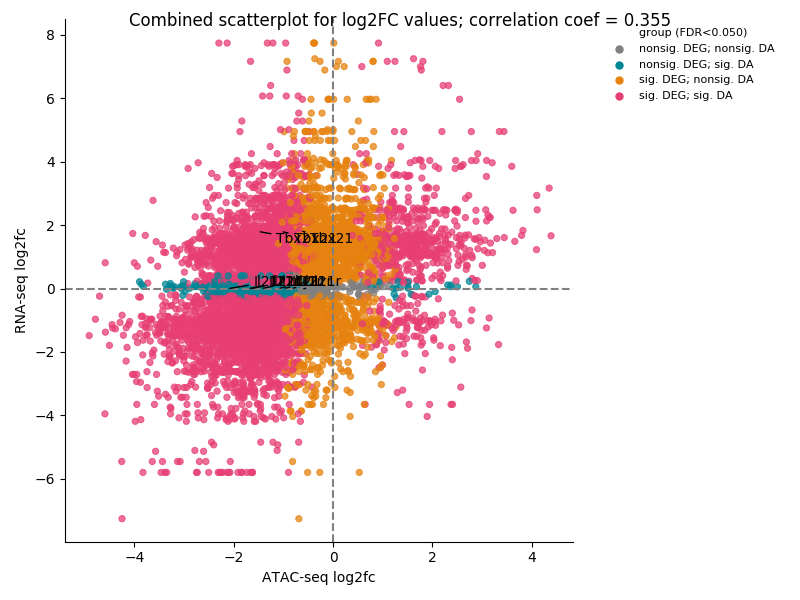

In [29]:
from IPython.display import display,Image
display(Image('/data/reddylab/Revathy/collabs/Keith/Th2/data/integration/plots/Th2_Th0.72hr.rna_atac.new.combined_scatter_plot.fdr0.05.png'))
    

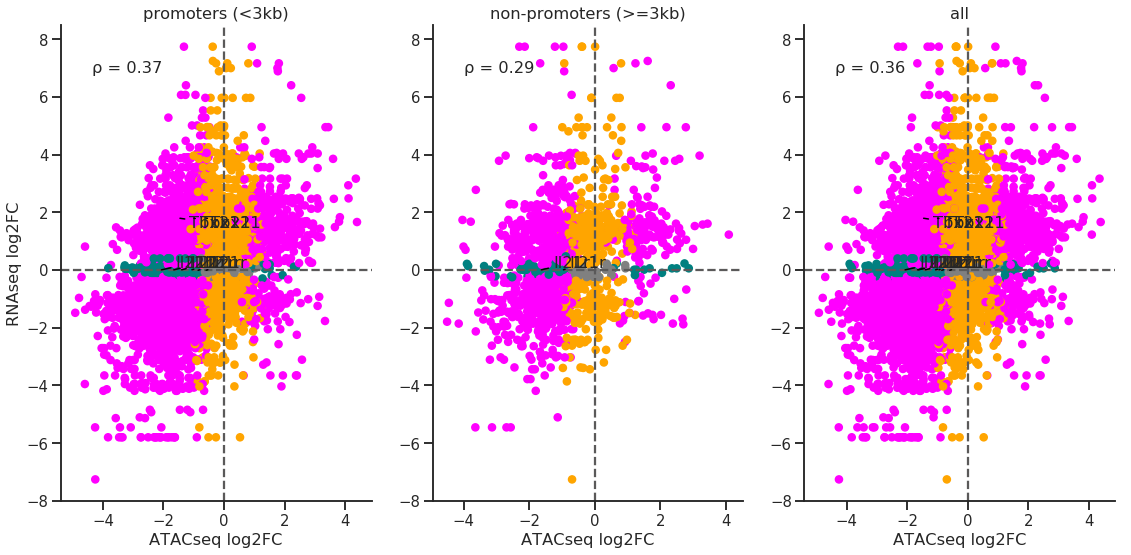

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 
%matplotlib inline


def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.1, .9), xycoords=ax.transAxes)


merged = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th2/data/integration/plots/Th2_Th0.72hr.rna_atac.new.combined_scatter_plot.fdr0.05.txt', sep='\t')
merged['Annotation'] = ['Promoter' if (x < 3000) else 'Non-promoter' for x in merged['distance']] 
# merged_promoter = merged[merged['Annotation'] == 'Promoter']
# merged_nonpromoter = merged[merged['Annotation'] == 'Non-promoter']
colors = {'sig. DEG; sig. DA': 'magenta', 'sig. DEG; nonsig. DA': 'orange', 'nonsig. DEG; sig. DA': 'teal', 'nonsig. DEG; nonsig. DA': 'grey'}


sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
fig, ax = plt.subplots(1, 3, figsize=(16,8))

ax1 = ax.flatten()[0]
points = ax1.scatter(
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_rnaseq'],
    c=merged.loc[np.abs(merged.distance)<3000, 'group (FDR<0.050)'].apply(lambda x: colors[x]),
    vmax=1e4, s=50)
corrfunc(
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_rnaseq'],
    ax=ax1, method='spearman'
)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_rnaseq'],
    c=merged.loc[np.abs(merged.distance)>=3000, 'group (FDR<0.050)'].apply(lambda x: colors[x]),
    vmax=1e4, s=50)
corrfunc(
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_atacseq'],
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_rnaseq'],
    ax=ax2, method='spearman'
)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    merged.loc[:, 'log2FoldChange_atacseq'],
    merged.loc[:, 'log2FoldChange_rnaseq'],
    c=merged.loc[:, 'group (FDR<0.050)'].apply(lambda x: colors[x]),
    vmax=1e4, s=50)
corrfunc(
    merged.loc[:, 'log2FoldChange_atacseq'],
    merged.loc[:, 'log2FoldChange_rnaseq'],
    ax=ax3, method='spearman'
)

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATACseq log2FC')
ax1.set_ylabel('RNAseq log2FC')
ax1.set_title('promoters (<3kb)')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATACseq log2FC')
ax2.set_title('non-promoters (>=3kb)')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.set_xlabel('ATACseq log2FC')
ax3.set_title('all')
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')

sig_genes = ['Tbx21', 'Foxp3','Il21r']

### can take unique of the genes with the highest values of log2FC for annotating
for x, y, t in zip(
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_atacseq'], 
    merged.loc[np.abs(merged.distance)<3000, 'log2FoldChange_rnaseq'], 
    merged.loc[np.abs(merged.distance)<3000, 'genes']):
    if t not in sig_genes: continue
    ax1.annotate('{}'.format(t), xy=(x, y), 
                    xytext=(.75*x, .75*y), #xytext=(5, 0), 
                    ha='left', va='bottom', #ha='left',
                    arrowprops=dict(arrowstyle='-', color='black'))
    
for x, y, t in zip(
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_atacseq'], 
    merged.loc[np.abs(merged.distance)>=3000, 'log2FoldChange_rnaseq'], 
    merged.loc[np.abs(merged.distance)>=3000, 'genes']):
    if t not in sig_genes: continue
    ax2.annotate('{}'.format(t), xy=(x, y), 
                    xytext=(.75*x, .75*y), #xytext=(5, 0), 
                    ha='left', va='bottom', #ha='left',
                    arrowprops=dict(arrowstyle='-', color='black'))

for x, y, t in zip(
    merged.loc[:, 'log2FoldChange_atacseq'], 
    merged.loc[:, 'log2FoldChange_rnaseq'], 
    merged.loc[:, 'genes']):
    if t not in sig_genes: continue
    ax3.annotate('{}'.format(t), xy=(x, y), 
                    xytext=(.75*x, .75*y), #xytext=(5, 0), 
                    ha='left', va='bottom', #ha='left',
                    arrowprops=dict(arrowstyle='-', color='black'))

# plt.legend(bbox_to_anchor=(1,1), frameon=False, fontsize=10, labels=labels)
# plt.ylabel('RNAseq logFC')
# plt.xlabel('ATACseq logFC')

sns.despine()
plt.tight_layout()
#plt.savefig('/data/reddylab/Revathy/dev/Keith/data/integrative/plots/coordinate_plot_ATAC_RNA_Pdpn.pdf')

plt.show()


In [75]:
merged[(merged['log2FoldChange_atacseq']>0)&(merged['log2FoldChange_rnaseq']>6)]

,Unnamed: 0_atacseq,baseMean_atacseq,log2FoldChange_atacseq,lfcSE_atacseq,pvalue_atacseq,padj_atacseq,genes,distance,Unnamed: 0_rnaseq,baseMean_rnaseq,log2FoldChange_rnaseq,lfcSE_rnaseq,pvalue_rnaseq,padj_rnaseq,GeneName,GeneType,group (FDR<0.050),Annotation
828,chr11_53626814_53628164,254.119651,0.578887,0.230518,1.088277e-02,1.634553e-02,Il13,3160,ENSMUSG00000020383.1,6669.478919,6.999098,0.426265,3.235503e-62,4.958960e-61,Il13,protein_coding,sig. DEG; sig. DA,Non-promoter
829,chr11_53630094_53630667,71.595824,1.762365,0.392471,2.774249e-06,7.969194e-06,Il13,657,ENSMUSG00000020383.1,6669.478919,6.999098,0.426265,3.235503e-62,4.958960e-61,Il13,protein_coding,sig. DEG; sig. DA,Promoter
830,chr11_53634441_53634899,83.324769,0.223733,0.355089,5.148268e-01,5.481482e-01,Il13,0,ENSMUSG00000020383.1,6669.478919,6.999098,0.426265,3.235503e-62,4.958960e-61,Il13,protein_coding,sig. DEG; nonsig. DA,Promoter
831,chr11_53635344_53636722,224.377332,0.064908,0.263229,8.017588e-01,8.208755e-01,Il13,-643,ENSMUSG00000020383.1,6669.478919,6.999098,0.426265,3.235503e-62,4.958960e-61,Il13,protein_coding,sig. DEG; nonsig. DA,Promoter
1666,chr13_4152530_4152859,15.769121,2.216500,0.788736,8.193711e-04,1.547036e-03,Akr1c18,-1877,ENSMUSG00000021214.13,634.875082,6.403811,0.255166,1.722010e-140,1.139907e-138,Akr1c18,protein_coding,sig. DEG; sig. DA,Promoter
1667,chr13_4157876_4158260,13.353725,2.323310,0.861999,8.992463e-04,1.685786e-03,Akr1c18,-7223,ENSMUSG00000021214.13,634.875082,6.403811,0.255166,1.722010e-140,1.139907e-138,Akr1c18,protein_coding,sig. DEG; sig. DA,Promoter
2521,chr15_75001668_75001837,14.673933,1.620161,0.761458,1.208902e-02,1.797741e-02,Ly6a,-3638,ENSMUSG00000075602.10,2506.688325,7.246395,0.263477,3.580563e-168,3.330541e-166,Ly6a,protein_coding,sig. DEG; sig. DA,Promoter
3182,chr17_35473196_35474098,37.434170,1.776564,0.547882,4.216333e-04,8.409985e-04,H2-Q10,0,ENSMUSG00000067235.14,457.881276,6.889913,0.501478,1.359078e-44,1.287485e-43,H2-Q10,protein_coding,sig. DEG; sig. DA,Promoter
4533,chr1_171627739_171628399,71.419298,1.246774,0.390890,8.840442e-04,1.659342e-03,Slamf7,4004,ENSMUSG00000038179.13,3126.050619,7.164480,0.163901,0.000000e+00,0.000000e+00,Slamf7,protein_coding,sig. DEG; sig. DA,Non-promoter
4534,chr1_171631227_171631711,38.122340,0.107143,0.504950,8.202177e-01,8.381083e-01,Slamf7,692,ENSMUSG00000038179.13,3126.050619,7.164480,0.163901,0.000000e+00,0.000000e+00,Slamf7,protein_coding,sig. DEG; nonsig. DA,Promoter


### Proximity analysis

In [64]:
import pandas as pd

# increase_ATAC = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.increase.bed', sep='\t', names=['chr','start','end'])
# #increase_ATAC = increase_ATAC.dropna()
# #increase_ATAC.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.filtered.increase.bed', sep='\t', index=False, header=None)

# decrease_ATAC = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.decrease.bed', sep='\t', names=['chr','start','end'])
# decrease_ATAC = decrease_ATAC.dropna()
# decrease_ATAC.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.filtered.decrease.bed', sep='\t', index=False, header=None)

Th1_ATAC = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.txt', sep='\t')
Th1_ATAC = Th1_ATAC.reset_index()
Th1_ATAC = Th1_ATAC.rename(columns={'index':'chr_start_end'})
Th1_ATAC[['chr','start','end']] = Th1_ATAC['chr_start_end'].str.split('_', expand=True)
Th1_ATAC = Th1_ATAC[Th1_ATAC.padj<0.05]
Th1_ATAC_bed = Th1_ATAC[['chr','start','end']]
Th1_ATAC_bed.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.sig_peaks.bed', sep='\t', index=False, header=None)


In [53]:
import pandas as pd

genes_file = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered_with_padj.txt', sep = '\t')
bed_file = pd.read_csv('/data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed', sep = '\t', names=['Chr', 'Start', 'End', 'Unnamed: 0', 'score', 'strand', 'GeneName', 'GeneFunc'])
genes_data = genes_file.merge(bed_file, on='Unnamed: 0', how='inner')

genes_data_bed = genes_data[['Chr','Start','End']]
genes_data_bed.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered_with_padj.bed',index=False, header=False, sep='\t')


In [80]:
%%bash
module load gcc
export PYTHONPATH='/data/reddylab/projects/reddylab_utils/'
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/projects/reddylab_utils/scripts/plot_cdf_distance_queries_to_target_bed.py \
--queries /data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.increase.bed /data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.decrease.bed /data/reddylab/Revathy/collabs/Keith/Th1/data/atac_seq/deseq/Th1.96hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.sig_peaks.bed \
--names "increase" "decrease" "all peaks" \
--target /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/Th1.Sorted.72hr.filtered_with_padj.bed \
-o /data/reddylab/Revathy/collabs/Keith/Th1/data/integration/plots/Th1_inc_dec_DA_peaks_with_RUV_filtered_DE_genes_from_clustering.png \
--min_log_dist 3 \
--max_log_dist 7 \
--fig_size_x 8 \
--fig_size_y 5 \

Median distance increase to nearest target site = 814.7925 Kb
Median distance decrease to nearest target site = 828.898 Kb
Median distance all peaks to nearest target site = 820.7055 Kb
Mann-whitney U-test, decrease vs. increase, distance to nearest target site, p = 3.651e-01
Mann-whitney U-test, all peaks vs. increase, distance to nearest target site, p = 3.967e-01
Mann-whitney U-test, all peaks vs. decrease, distance to nearest target site, p = 4.404e-01


***** WARNING: File /tmp/pybedtools.uRpgz2.tmp has inconsistent naming convention for record:
chr1	9798106	9900845

***** WARNING: File /tmp/pybedtools.uRpgz2.tmp has inconsistent naming convention for record:
chr1	9798106	9900845



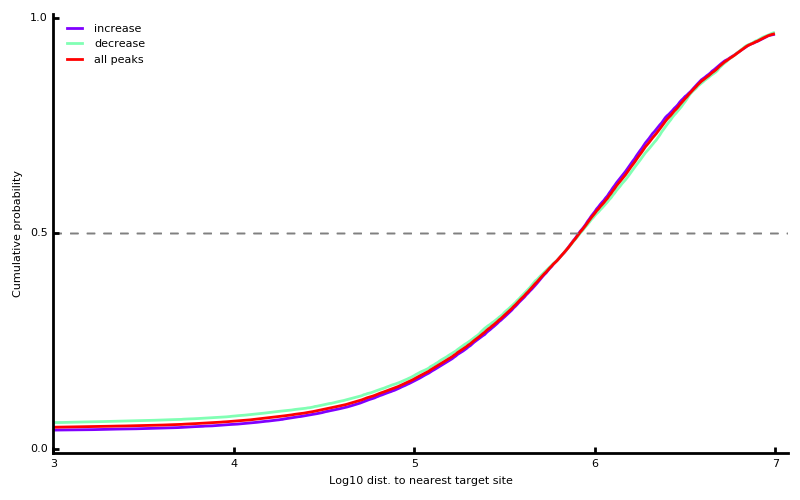

In [81]:
from IPython.display import display,Image

display(Image('/data/reddylab/Revathy/collabs/Keith/Th1/data/integration/plots/Th1_inc_dec_DA_peaks_with_RUV_filtered_DE_genes_from_clustering.png'))
